#**Online Shopping Sales Dataset**

###**Data source**
kaggle.com/datasets/jacksondivakarr/online-shopping-dataset/data

###**Project**
Exploratory Data Analysis of online shopping sales. Questions answered through this analysis;

1. What brings in the most revenue?
2. Who brings in the most revenue?
3. When to expect the most sales and revenue.
4. What are the customer demographics?
5. Influence of customer behaviour on sales and revenue?



### **Data Description**

CustomerID - Unique Identifier for each customer.

Gender - Gender of customer.

Location - Location of the customer.

Tenure_Months - Number of months the customer has been with the platform.

Transaction_ID - Unique Identifier for each transaction.

Transaction_Date - Date transaction was made.

Product_SKU - Stock Keeping Unit (SKU) identifier for the product.

Product_Description - Description of the product.

Product_Category - Category of the product.

Quantity - Quantity of the product purchased in one transaction.

Avg_Price - Average price of the product.

Delivery_Charges - delivery charge for the product.

Coupon_Status - Status of coupon for the transaction.

GST - Goods and Services Tax for the transaction.

Date - Date of when the Transaction was made.

Offline_Spend - Amount customer has spent offline.

Online_Spend - Amount customer has spent online.

Month - Month the transaction was made.

Coupon_Code - Coupon code available for the transaction.

Discount_pct - Percentage of discount applied to the transaction.







#### **Import necessary libraries.**


In [126]:
#Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


In [127]:
#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [128]:
#to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x:'%.3f' % x)

In [129]:
#Allow colab access to my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Import dataset.**


In [130]:
data = pd.read_csv ('/content/drive/MyDrive/file.csv')


## **Understanding and Cleaning the Dataset**



**View the first and last 5 rows of the datasets**

In [131]:
# First 5 rows
data.head()


,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.000,M,Chicago,12.000,16679.000,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.710,6.500,Used,0.100,1/1/2019,4500.000,2424.500,1,ELEC10,10.000
1,1,17850.000,M,Chicago,12.000,16680.000,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.710,6.500,Used,0.100,1/1/2019,4500.000,2424.500,1,ELEC10,10.000
2,2,17850.000,M,Chicago,12.000,16696.000,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.770,6.500,Not Used,0.100,1/1/2019,4500.000,2424.500,1,ELEC10,10.000
3,3,17850.000,M,Chicago,12.000,16699.000,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.500,6.500,Clicked,0.100,1/1/2019,4500.000,2424.500,1,ELEC10,10.000
4,4,17850.000,M,Chicago,12.000,16700.000,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.710,6.500,Clicked,0.100,1/1/2019,4500.000,2424.500,1,ELEC10,10.000


In [132]:
#Last 5 rows
data.tail()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
52950,52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.000
52951,52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.000
52952,52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.000
52953,52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.000
52954,52954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,AND30,30.000






*   Last 5 rows have missing values.








**Checking for missing values in the data.**

In [133]:
data.isnull().sum()

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64



*   There are missing values in 18 columns of the data.

*   Discount_pct column and Coupon code coloumn are missing a lot of values.
*   Besides Discount_oct column and Coupon_Code column the other columns are missing the exact same number of values which is an indication of a pattern.



**Treating Missing Values**

In [134]:
#extracting all info of other variables where CustomerId is null
data.loc[data['CustomerID'].isnull()==True]

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
52924,52924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NOTES10,10.000
52925,52925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NOTES20,20.000
52926,52926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NOTES30,30.000
52927,52927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NE10,10.000
52928,52928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NE20,20.000
52929,52929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NE30,30.000
52930,52930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accessories,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,ACC20,20.000
52931,52931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NOTES10,10.000
52932,52932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NOTES20,20.000
52933,52933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NOTES30,30.000


* We see that there is no data entry in other columns where CustomerID is missing
* We are going to drop all rows with missing CustomerID values.

In [135]:
#Dropping missing values.
filtr=data.loc[52924:]
data.drop(index=filtr.index,inplace=True)


In [136]:
#Check if all missing values have been dropped.
data.isnull().sum()


Unnamed: 0               0
CustomerID               0
Gender                   0
Location                 0
Tenure_Months            0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
GST                      0
Date                     0
Offline_Spend            0
Online_Spend             0
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64



*   Missing values where CustomerID is missing have been dropped
* Missing values in Coupon Code column and Discount pct column have been left as is because they are meant to be missing. No coupon code means that there was no discount code.



* All missing values where CustomerID is missing have been dropped.


**Understanding Shape of dataset**

In [137]:
#shape of dataset
print ("There are", data.shape[0], 'rows and',data.shape[1], "columns.")

There are 52924 rows and 21 columns.


**Checking data types of the columns for the dataset**

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52924 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52924 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 


*   There are 12 numerical columns in the data and 9 object type columns.






**Checking for duplicate values.**

In [139]:
data.duplicated().sum()

0



*   There are no duplicate values.




**Checking the stastical summary of the data.**

In [140]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,52924.000,26461.500,15277.987,0.000,13230.750,26461.500,39692.250,52923.000
CustomerID,52924.000,15346.710,1766.556,12346.000,13869.000,15311.000,16996.250,18283.000
Tenure_Months,52924.000,26.128,13.478,2.000,15.000,27.000,37.000,50.000
Transaction_ID,52924.000,32409.826,8648.669,16679.000,25384.000,32625.500,39126.250,48497.000
Quantity,52924.000,4.498,20.105,1.000,1.000,1.000,2.000,900.000
Avg_Price,52924.000,52.238,64.007,0.390,5.700,16.990,102.130,355.740
Delivery_Charges,52924.000,10.518,19.476,0.000,6.000,6.000,6.500,521.360
GST,52924.000,0.137,0.046,0.050,0.100,0.180,0.180,0.180
Offline_Spend,52924.000,2830.914,936.154,500.000,2500.000,3000.000,3500.000,5000.000
Online_Spend,52924.000,1893.109,807.014,320.250,1252.630,1837.870,2425.350,4556.930




*   ***Tenure Months*** - the longest a customer's tenure is 50 months and the average tenure is 26.128 months
*   ***Quantity*** - has a very large standard deviation of *20.105* with the median being *1* and the mean being *4.498*. There is also a huge difference between the max value and the 75% percentile which indicates the possible presence of outliers.



In [141]:
#checking the total number of unique values in the Transaction ID column
data['Transaction_ID'].nunique()

25061



*   There are a total of 25061 different tansactions in the data.



In [142]:
#checking the total number of unique values in the CustomerID column
data['CustomerID'].nunique()

1468



*   There is a total of 1468 different customers in the data.



**Count and percentage of categorical levels in Gender, Location, Coupon code and Coupon Status coloumns.**


In [143]:
#listing all categorical values
cat_cols = ['Gender','Location','Coupon_Status','Product_Category']

#Count of unique categorical levels in each column
for column in cat_cols:
  print(data[column].value_counts())
  print("_" * 50)

F    33007
M    19917
Name: Gender, dtype: int64
__________________________________________________
Chicago          18380
California       16136
New York         11173
New Jersey        4503
Washington DC     2732
Name: Location, dtype: int64
__________________________________________________
Clicked     26926
Used        17904
Not Used     8094
Name: Coupon_Status, dtype: int64
__________________________________________________
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                 

In [144]:
#Percentage of unique categorical levels in each column
for column in cat_cols:
  print(data[column].value_counts(normalize=True))
  print("-" *50)

F   0.624
M   0.376
Name: Gender, dtype: float64
--------------------------------------------------
Chicago         0.347
California      0.305
New York        0.211
New Jersey      0.085
Washington DC   0.052
Name: Location, dtype: float64
--------------------------------------------------
Clicked    0.509
Used       0.338
Not Used   0.153
Name: Coupon_Status, dtype: float64
--------------------------------------------------
Apparel                0.342
Nest-USA               0.265
Office                 0.123
Drinkware              0.066
Lifestyle              0.058
Nest                   0.042
Bags                   0.036
Headgear               0.015
Notebooks & Journals   0.014
Waze                   0.010
Nest-Canada            0.006
Bottles                0.005
Accessories            0.004
Fun                    0.003
Gift Cards             0.003
Housewares             0.002
Google                 0.002
Backpacks              0.002
More Bags              0.001
Android            



*   ***Coupon_Status*** - Only *33.8%* of the coupons were used whereas *50.9%* were only clicked
*   ***Product_Category*** - *Apparel* is the most popular category at *34.2%*
*   ***Location*** - *Chicago* has the highest number of customers with a percentage of *34.7%* and *Washington* has the least customers with a percentage of *5.2%*
*   ***Gender*** - Most customers are *female* with a percentage of *62.4%*




In [145]:
#Saving clean dataset
data.to_csv('/content/drive/MyDrive/Cleaned_File.csv')

##**Univariate Analysis**

In [146]:
#import new cleaned dataset
data=pd.read_csv('Cleaned_File.csv')

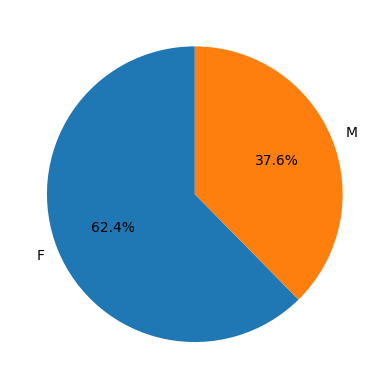

In [147]:
gender=data['Gender'].value_counts()
plt.pie(gender,labels=gender.index, autopct= '%1.1f%%', startangle=90)
plt.show()

**Observations- Gender**
* There are more female customers than male customers.

[Text(0, 0, '18380'),
 Text(0, 0, '16136'),
 Text(0, 0, '11173'),
 Text(0, 0, '4503'),
 Text(0, 0, '2732')]

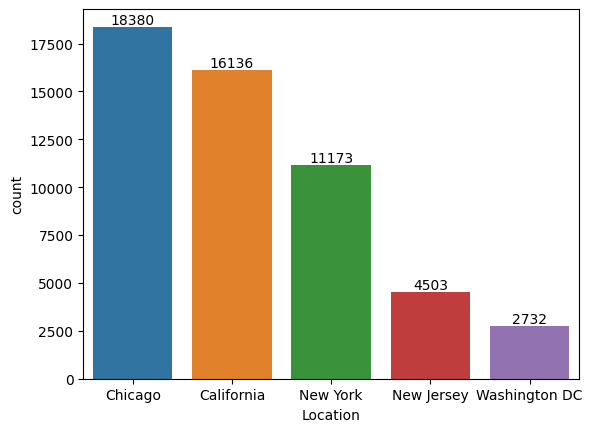

In [148]:
a= sns.countplot(data=data, x='Location')
a.bar_label(a.containers[0])

**Observations- Location**
* Most customers come from Chicago and Washington DC has the least number of customers.


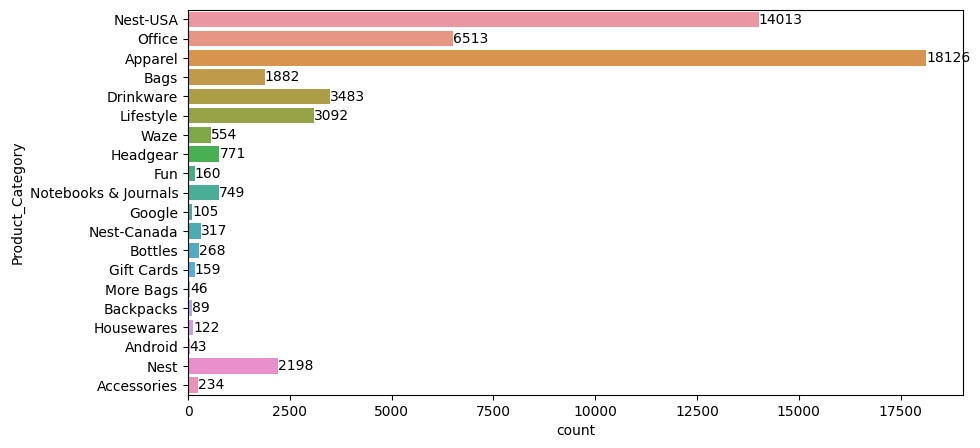

In [149]:
plt.figure(figsize=(10,5))
p=sns.countplot(data=data,y='Product_Category')
p.bar_label(p.containers[0])
plt.show()

**Observations- Product Category**

*   Apparel is the most popular product category.
*   Android is the least popular product category.




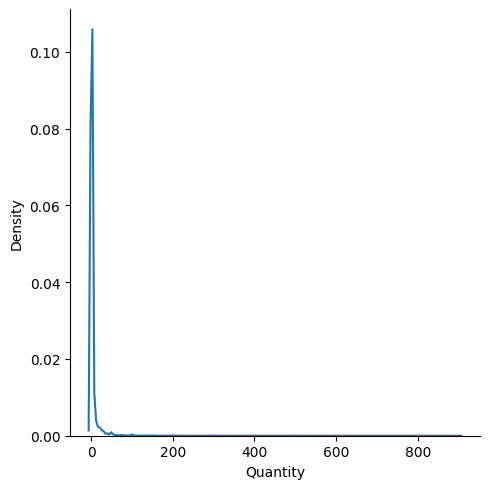

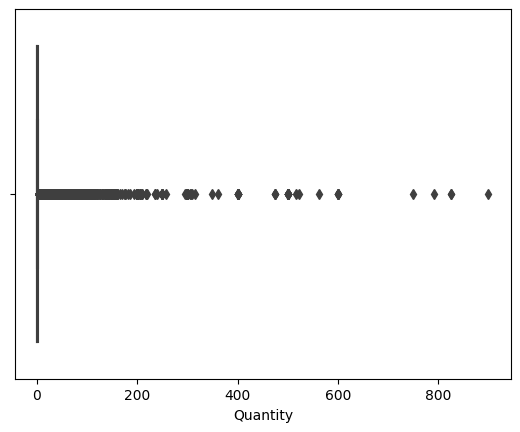

In [150]:
sns.displot(data=data,x='Quantity',kind='kde')
plt.show()
sns.boxplot(data=data,x='Quantity')
plt.show()

**Observations**
* Majority of the customers buy products in very little qauntities.

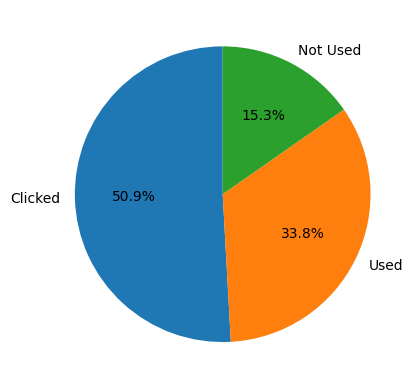

In [151]:
cps= data['Coupon_Status'].value_counts()
plt.pie(cps, labels=cps.index, autopct='%1.1f%%', startangle=90)
plt.show()

**Observations- Coupon Status**

* Only *33.8%* of the available coupons are used.

[Text(0, 0, '4063'),
 Text(0, 0, '3284'),
 Text(0, 0, '4346'),
 Text(0, 0, '4150'),
 Text(0, 0, '4572'),
 Text(0, 0, '4193'),
 Text(0, 0, '5251'),
 Text(0, 0, '6150'),
 Text(0, 0, '4288'),
 Text(0, 0, '4164'),
 Text(0, 0, '3961'),
 Text(0, 0, '4502')]

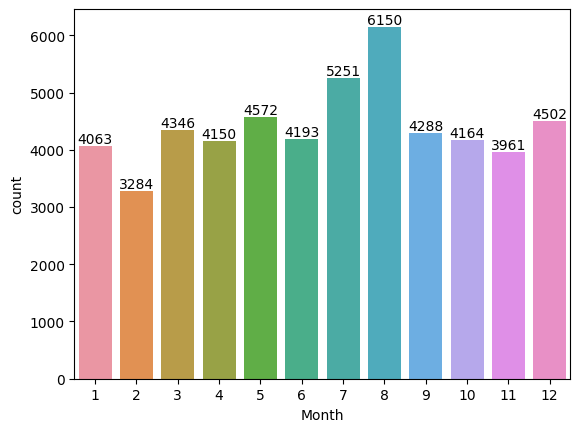

In [152]:
months= sns.countplot(data=data, x='Month')
months.bar_label(months.containers[0])

**Observations- Month sales**
* August has the most sales
* February has the least amount of sales.

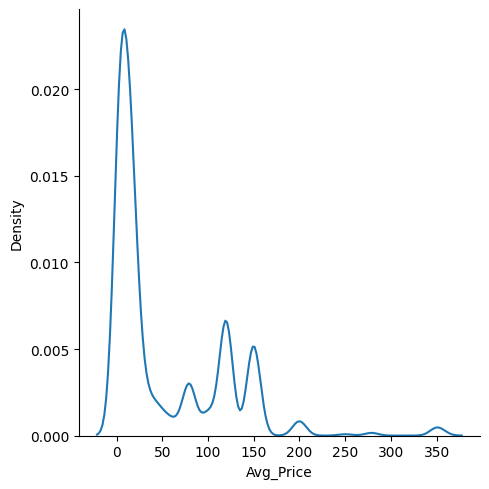

In [153]:
sns.displot(data=data,x='Avg_Price', kind='kde')
plt.show()

**Observations**

* The average price of most products is under $50.

[Text(0, 0, '649'),
 Text(0, 0, '625'),
 Text(0, 0, '1055'),
 Text(0, 0, '1543'),
 Text(0, 0, '1296'),
 Text(0, 0, '985'),
 Text(0, 0, '1202'),
 Text(0, 0, '626'),
 Text(0, 0, '1448'),
 Text(0, 0, '902'),
 Text(0, 0, '999'),
 Text(0, 0, '1006'),
 Text(0, 0, '819'),
 Text(0, 0, '676'),
 Text(0, 0, '1009'),
 Text(0, 0, '801'),
 Text(0, 0, '874'),
 Text(0, 0, '1358'),
 Text(0, 0, '914'),
 Text(0, 0, '1590'),
 Text(0, 0, '1101'),
 Text(0, 0, '848'),
 Text(0, 0, '1188'),
 Text(0, 0, '1853'),
 Text(0, 0, '802'),
 Text(0, 0, '1064'),
 Text(0, 0, '1417'),
 Text(0, 0, '1069'),
 Text(0, 0, '1656'),
 Text(0, 0, '949'),
 Text(0, 0, '1252'),
 Text(0, 0, '1648'),
 Text(0, 0, '1670'),
 Text(0, 0, '825'),
 Text(0, 0, '703'),
 Text(0, 0, '1379'),
 Text(0, 0, '924'),
 Text(0, 0, '1120'),
 Text(0, 0, '2043'),
 Text(0, 0, '985'),
 Text(0, 0, '755'),
 Text(0, 0, '889'),
 Text(0, 0, '1223'),
 Text(0, 0, '1469'),
 Text(0, 0, '756'),
 Text(0, 0, '497'),
 Text(0, 0, '884'),
 Text(0, 0, '841'),
 Text(0, 0, '737

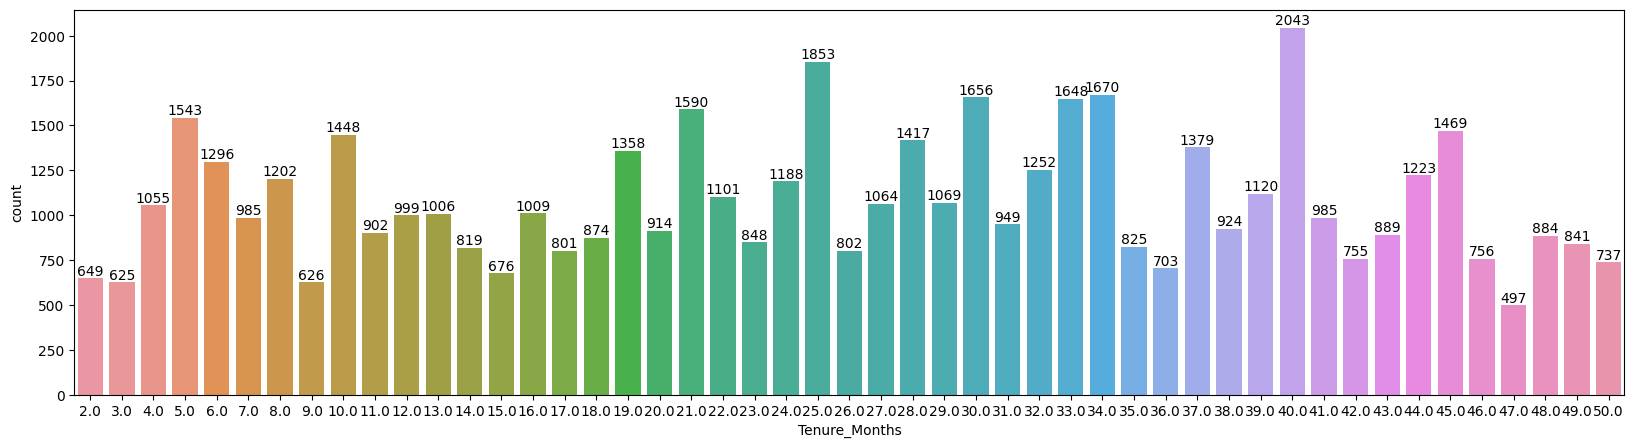

In [154]:
plt.figure(figsize=(20,5))
t=sns.countplot(data=data,x='Tenure_Months')
t.bar_label(t.containers[0])


**Observations**
* The longest a customer has been on the platform is 50 months.
* The 40th month has the highest number of customers.


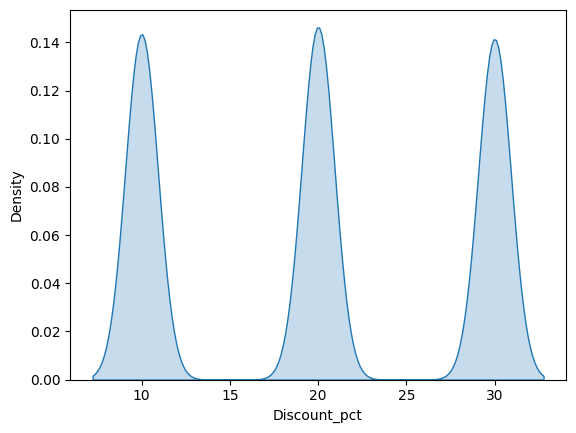

In [155]:
sns.kdeplot(data=data,x='Discount_pct', fill=True)
plt.show()

**Observations**
* The discount offered on the product is mostly equal as the 20% discount is applied slightly more than the others.

###**Bivariate Analysis**

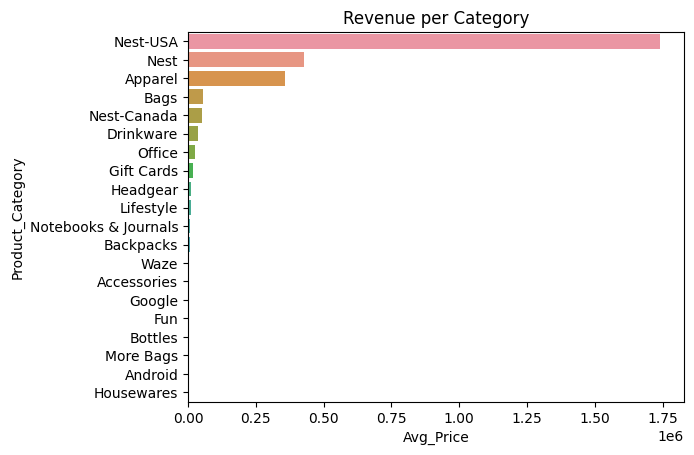

In [156]:
pc=data.groupby(['Product_Category'],as_index=False)['Avg_Price'].sum().sort_values(by='Avg_Price',ascending=False)
sns.barplot(data=pc,x='Avg_Price',y='Product_Category')
plt.title('Revenue per Category')
plt.show()

**Observations**
* Nest-USA is the category that brings in the most revenue.
* Housewares is the category that brings in the least revenue.

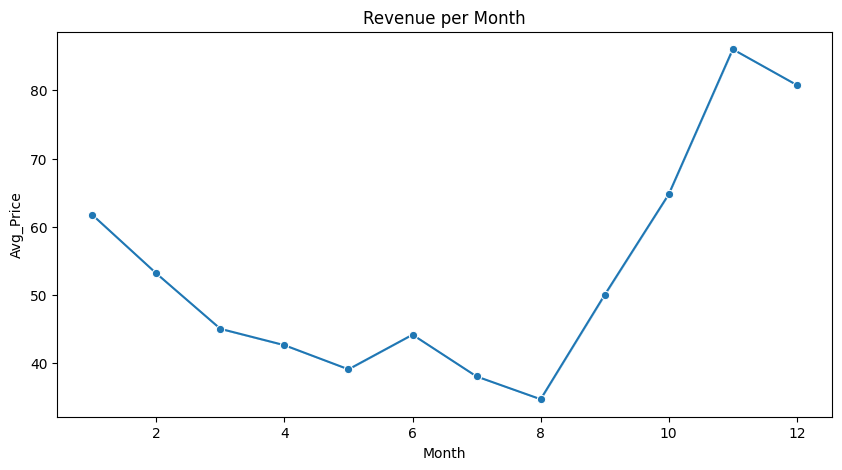

In [157]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='Month',y='Avg_Price',marker='o',errorbar=('ci',False))
plt.title('Revenue per Month')
plt.show()

**Observations**
* The month with the most revenue is month 11(November)
* Although month 8(August) has the most sales as seen previously, it has the least revenue.


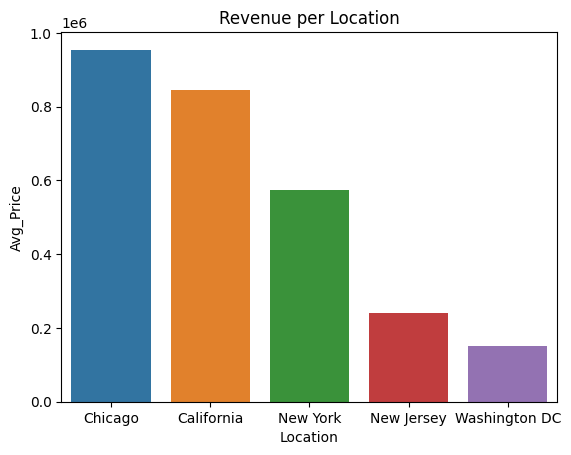

In [158]:
loc=data.groupby(['Location'],as_index=False)['Avg_Price'].sum().sort_values(by='Avg_Price',ascending=False)
sns.barplot(data=loc,x='Location',y='Avg_Price')
plt.title('Revenue per Location')
plt.show()

**Observations**
* Chicago brings in the most revenue and Washington Dc brings in the least revenue.

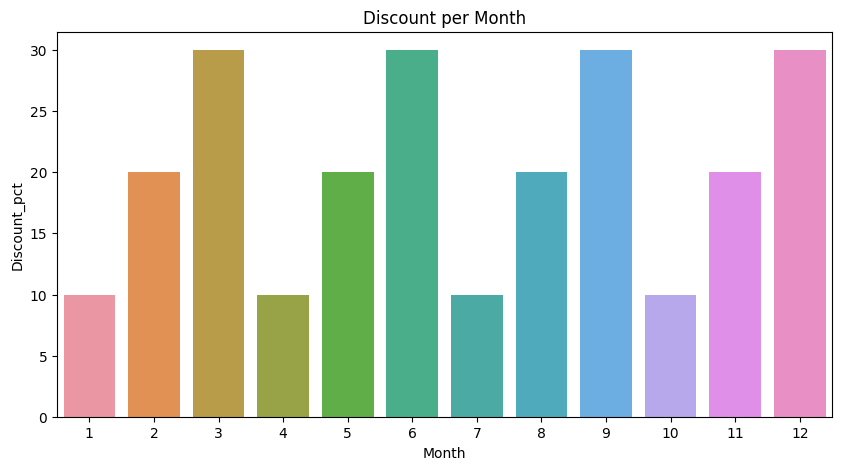

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Month',y='Discount_pct')
plt.title('Discount per Month')
plt.show()

**Observations**
* There is a large sale (30%) during the last month of every quarter

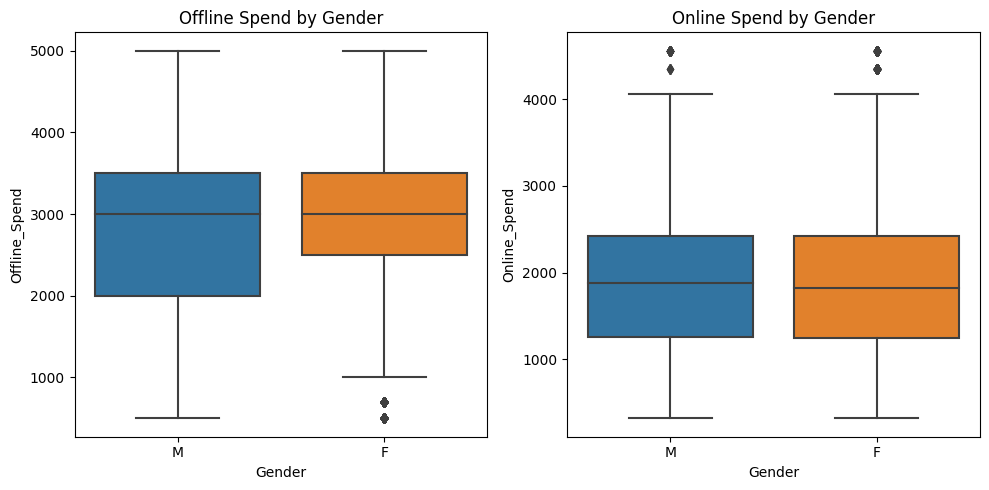

In [160]:
fig,sp=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=data['Gender'],y=data['Offline_Spend'],ax=sp[0])
sp[0].set_title('Offline Spend by Gender')

sns.boxplot(x=data['Gender'], y=data['Online_Spend'],ax=sp[1])
sp[1].set_title('Online Spend by Gender')
plt.tight_layout()
plt.show()

**Observations**
* Customers are still spending more offline more than online.


##**Conclusions**

*   Chicago has the highest number of customers.

*  Most of the customers on the platform are female.

*   Nest-USA products bring in the most revenue however, Apparel products have the most sales. Nest-USA products are probably high ticket products.

*   Month 8 (August ) sees the most sales but it brings in the least revenue.

*   Month 11(November) brings in the most revenue, followed by month 12(December) then 1(January). Which shows that the platform gets the most revenue during the Winter Season. It is the holiday season and there is a high incentive to shop.

*   Discounts are available all year round, however the last month of every quarter there is a large sale with a 30% discount. This is probably be because the platform is trying to reach their quarterly targets thus the massive sale to incentivize shoppers.

* Only an approximate of 34% coupons are used, whilst 51% are clicked but not used. This could be a sign that the customers do not think the discounts are worth it or they forget to apply the coupon code at checkout after clicking it. However, this is beneficial for the platform as their profit will not experience much of a hit.

*  The longest a  customer has been associate with the platform is 50 months and the average number of months a customer has been on the platform is 26 months. This shows that the platform has a high ratio of returning customers.

*   Offline spend is higher than Online spend which is an indication that customers still prefer to shop in store than online.







In [167]:
!jupyter nbconvert--to html 'EDA_Online_Shopping_Sales.ipynb'

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir] [--paths] [--json]
               [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: bundlerextension console dejavu execute kernel kernelspec migrate nbclassic
nbconvert nbextension notebook run server serverextension troubleshoot trust

Jupyter command `jupyter-nbconvert--to` not found.
